In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from scipy.optimize import minimize, rosen, rosen_der,root
from sklearn.decomposition import PCA

%load_ext autoreload
%autoreload 2

from boa_rnn import utils

In [2]:
np.random.seed(0)

n = 100
num_trials = 10
g = 1.1

T_max = 40
num_steps = 20000
dt = T_max/num_steps
ts = np.linspace(0,T_max,num_steps)
u = np.zeros((n,num_steps))
B = np.zeros((n,n))


W = utils.create_random_stable_weight_matrix(n = n, scale = g, return_eigs = False)

init_scale = 1

In [3]:
x = np.random.uniform(-5,5,(n,num_trials))

xs = np.zeros((n,num_trials,num_steps))

#Euler integrate
for step in range(num_steps):
  x += dt*utils.RNN_update(x,W)
  xs[:,:,step] = x

In [8]:
#x0 = np.random.uniform(-10,10,(n))
sol = root(fun = utils.RNN_update, x0 = xs[:,0,-1], jac=utils.RNN_update_jac, method='hybr',args = (W))
x_star = sol.x

J_star = utils.RNN_update_jac(sol.x,W)
utils.check_linear_stability(J_star)


'Matrix is linearly stable.'

In [29]:
M = utils.get_local_lyapunov_metric(J = J_star)


In [19]:
xs_flattened = np.reshape(xs, newshape = (n,num_trials*num_steps))
pca = PCA(n_components=3)
xs_flattened_pca= pca.fit_transform(xs_flattened.T)

Q = pca.components_

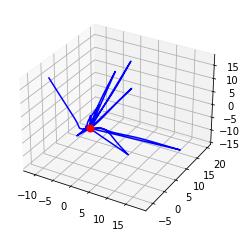

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(xs_flattened_pca[:,0],xs_flattened_pca[:,1],xs_flattened_pca[:,2],color = 'b')
#ax.plot(xs_flattened_projection[:,0],xs_flattened_projection[:,1],xs_flattened_projection[:,2],color = 'g')

x_star_pca = Q @ x_star

ax.scatter(x_star_pca[0],x_star_pca[1],x_star_pca[2],c = 'r',s = 50)

(100,)